In [34]:
from stable_baselines3.common.vec_env import DummyVecEnv, VecFrameStack
from stable_baselines3.common.callbacks import BaseCallback #for saving models
from gym.wrappers import FrameStack, GrayScaleObservation
from gym_super_mario_bros.actions import SIMPLE_MOVEMENT
from nes_py.wrappers import JoypadSpace
from matplotlib import pyplot as plt
from stable_baselines3 import PPO #main algorithm
import gym_super_mario_bros
import numpy as np
import time
import gym 
import os 

In [2]:
env = gym_super_mario_bros.make('SuperMarioBros-v0')
env = JoypadSpace(env, SIMPLE_MOVEMENT)

c:\Users\Haider\AppData\Local\Programs\Python\Python38\lib\site-packages\gym\envs\registration.py:505: UserWarning: WARN: The environment SuperMarioBros-v0 is out of date. You should consider upgrading to version `v3` with the environment ID `SuperMarioBros-v3`.
  logger.warn(


In [3]:
done = True 
for step in range (10000): 
    if done: 
        env.reset()
    state, reward, done, info = env.step(env.action_space.sample())#random movement for testing
    env.render()
env.close()

c:\Users\Haider\AppData\Local\Programs\Python\Python38\lib\site-packages\pyglet\image\codecs\wic.py:289: UserWarning: [WinError -2147417850] Cannot change thread mode after it is set
  warnings.warn(str(err))


KeyboardInterrupt: 

In [5]:
SIMPLE_MOVEMENT[env.action_space.sample()]
#if you re run the cell it will show the random action again and again 

['right', 'A', 'B']

In [6]:
state = env.reset()
# it is a single frame which is in color so we will give these values to the Ai model 
#on which the AI model will train after some preprocessing 

In [7]:
state.shape

(240, 256, 3)

Reward Function

The reward function assumes the objective of the game is to move as far right as possible (increase the agent's x value), as fast as possible, without dying. To model this game, three separate variables compose the reward:

    v: the difference in agent x values between states
        in this case this is instantaneous velocity for the given step
        v = x1 - x0
            x0 is the x position before the step
            x1 is the x position after the step
        moving right ⇔ v > 0
        moving left ⇔ v < 0
        not moving ⇔ v = 0
    c: the difference in the game clock between frames
        the penalty prevents the agent from standing still
        c = c0 - c1
            c0 is the clock reading before the step
            c1 is the clock reading after the step
        no clock tick ⇔ c = 0
        clock tick ⇔ c < 0
    d: a death penalty that penalizes the agent for dying in a state
        this penalty encourages the agent to avoid death
        alive ⇔ d = 0
        dead ⇔ d = -15

r = v + c + d

The reward is clipped into the range (-15, 15).

In [8]:
env.step(1)[1]
#so the value at the bottom is 0.0 this is the reward 
#and we have to train the AI to maximize this reward 
#it is 0 when the mario didnt do a thing and it increases
#whe it do something that is positive in game like stepping forward
#without dying or hitting a pipe

0.0

In [9]:
env.step(1)[3]

{'coins': 0,
 'flag_get': False,
 'life': 2,
 'score': 0,
 'stage': 1,
 'status': 'small',
 'time': 400,
 'world': 1,
 'x_pos': 40,
 'y_pos': 79}

1-so as we all know that the colored 
image is made up of R,G,B pixels and 
these are the individual values of the pixel 
but what if we convert the image to greyscale it would 
return the values between the 0,256 or 255 so it would possibally 
cut the training data to the half or even more so we need to



2- and also we have to do a frame stacking so out AI model have the 
history of the previous frame using that the model can predict the next frame
and also remember the location and movement of the enemy so we can use that to our advantage

A vectorization wrapper is a tool that wraps around multiple environments and allows them to be run in parallel. Instead of running one environment at a time, vectorized environments execute multiple environments simultaneously, making the training process faster and more efficient by collecting more data in less time.

In [10]:
import torch
print(torch.__version__)  # Check PyTorch version
print(torch.version.cuda)  # Check if CUDA is available
print(torch.backends.cudnn.version())  # Check cuDNN version

2.4.1+cu118
11.8
90100


In [11]:
env = gym.make('SuperMarioBros-v0', )
env = JoypadSpace(env, SIMPLE_MOVEMENT)

1-Create the envoirnment 

2-Wrap up the simulation in simple controls 

3- grayscale 

4- Frame stack

5-stack the frames

DummyVecEnv:

    It's a wrapper class that allows you to wrap a single environment or multiple environments to make them vectorized. It doesn't run the environments in parallel (this is what SubprocVecEnv or VecEnv are used for), but it makes the environment compatible with algorithms that expect vectorized environments.


In [12]:

env = gym.make('SuperMarioBros-v0')
env = JoypadSpace(env, SIMPLE_MOVEMENT)


In [13]:
env = GrayScaleObservation(env,keep_dim=True)


In [3]:


def make_env():
    env = gym_super_mario_bros.make('SuperMarioBros-v0')
    env = JoypadSpace(env, SIMPLE_MOVEMENT)
    env = GrayScaleObservation(env, keep_dim=True)
    env.render_mode = "human"  
    return env

env = DummyVecEnv([make_env])
env = VecFrameStack(env, 4, channels_order="last")


In [13]:
state = env.reset()

In [5]:
state.shape

(1, 240, 256, 4)

In [6]:
state[0]

array([[[  0,   0,   0, 140],
        [  0,   0,   0, 140],
        [  0,   0,   0, 140],
        ...,
        [  0,   0,   0, 140],
        [  0,   0,   0, 140],
        [  0,   0,   0, 140]],

       [[  0,   0,   0, 140],
        [  0,   0,   0, 140],
        [  0,   0,   0, 140],
        ...,
        [  0,   0,   0, 140],
        [  0,   0,   0, 140],
        [  0,   0,   0, 140]],

       [[  0,   0,   0, 140],
        [  0,   0,   0, 140],
        [  0,   0,   0, 140],
        ...,
        [  0,   0,   0, 140],
        [  0,   0,   0, 140],
        [  0,   0,   0, 140]],

       ...,

       [[  0,   0,   0, 214],
        [  0,   0,   0, 124],
        [  0,   0,   0, 124],
        ...,
        [  0,   0,   0, 124],
        [  0,   0,   0, 124],
        [  0,   0,   0,   0]],

       [[  0,   0,   0, 214],
        [  0,   0,   0, 124],
        [  0,   0,   0, 124],
        ...,
        [  0,   0,   0, 124],
        [  0,   0,   0,   0],
        [  0,   0,   0,   0]],

       [[  0

In [14]:
state , reward, done, info = env.step([1])

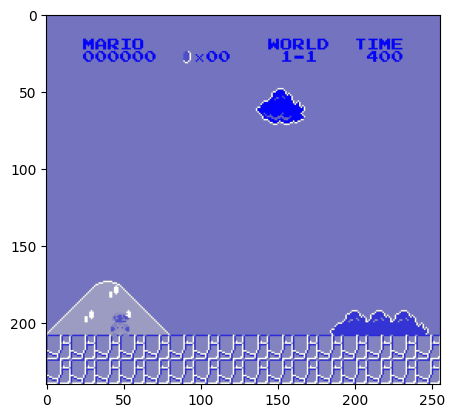

In [8]:
plt.imshow(state[0])

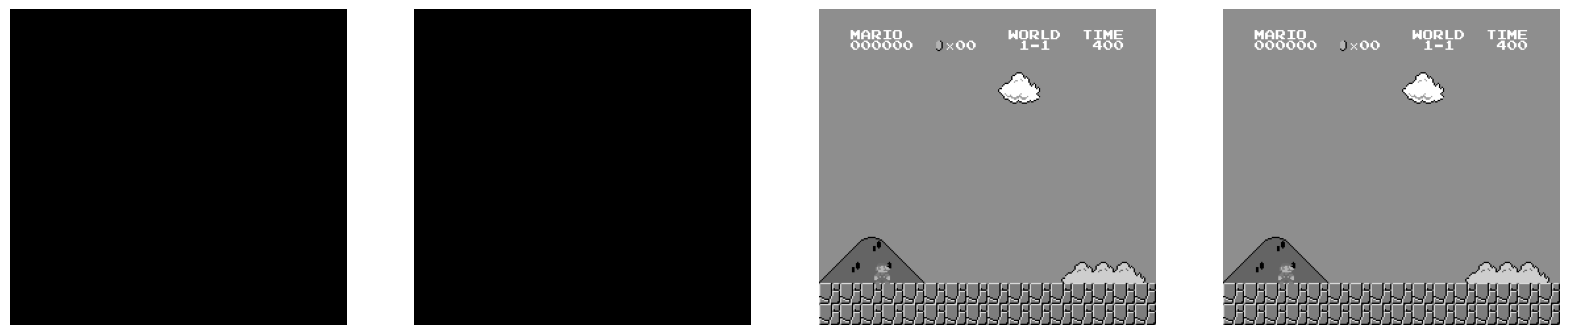

In [32]:
plt.figure(figsize=(20, 10))
for i in range(state.shape[-1]):
    plt.subplot(1, 4, i + 1)
    plt.imshow(state[0, :, :, i], cmap='gray')
    plt.axis('off')
plt.show()

**``PPO itself is a widely used policy gradient method in reinforcement learning that balances exploration and exploitation by optimizing policies with clipped updates to avoid drastic changes that might destabilize learning.``**

Clipped Objective Function: Prevents drastic policy updates, ensuring stable learning.
Sample Efficiency: Uses collected data more effectively, reducing training time.
Advantage Estimation: Helps evaluate actions by reducing variance and improving performance.
Entropy Regularization: Encourages exploration to avoid premature convergence.
Trust Region Constraint: Ensures gradual policy updates within safe limits.

In [35]:
class TrainAndLoggingCallback(BaseCallback):

    def __init__(self, check_freq, save_path, verbose=1):
        super(TrainAndLoggingCallback, self).__init__(verbose)
        self.check_freq = check_freq
        self.save_path = save_path

    def _init_callback(self):
        if self.save_path is not None:
            os.makedirs(self.save_path, exist_ok=True)

    def _on_step(self):
        if self.n_calls % self.check_freq == 0:
            model_path = os.path.join(self.save_path, 'best_model_{}'.format(self.n_calls))
            self.model.save(model_path)

        return True

In [ ]:
CHECKPOINT_DIR  = './train/'
LOG_DIR = './logs/'

Imagine you're teaching a robot to play a game. You want it to learn the best way to play by trying things out and adjusting its strategy, which is called a policy.  PPO is a way to help the robot improve its strategy in a safe and efficient way
.
Here's the gist:
•
Trying out a strategy: The robot plays the game for a bit, collecting data about what it did and what happened
.
•
Calculating the advantage: The robot figures out which actions in its current strategy were good and which were not so good. This is called calculating the advantage, which is how much better an action is compared to the average action in a state
.
•
Updating the strategy: Instead of completely changing its strategy based on this data, which can be risky, PPO makes small, careful adjustments
. It uses a special trick called "clipping"
.
◦
Clipping: Clipping limits how much the robot's new strategy can differ from the old one
. It's like putting a leash on the robot so it doesn't make huge, possibly bad, changes
.
◦
Why clipping?: Without a limit, the robot might make big changes that look good at first, but actually make its overall performance worse. Clipping helps PPO avoid these pitfalls
.
•
Multiple Updates: PPO doesn't just update the strategy once with the data it collected. It uses the same data to update the strategy multiple times which helps it learn more efficiently
.
•
Balancing Act: PPO also uses an additional bonus, called an entropy bonus, to encourage the robot to explore different strategies and to find more optimal strategies
.
Key Ideas of PPO:
•
It is more efficient than other methods: PPO is designed to be data-efficient meaning it can learn well with less data compared to older methods
.
•
It’s safer: PPO avoids large, potentially harmful updates
.
•
It’s general: It can work in various situations, including different types of games and problems and can work well with neural networks that use parameter sharing
.
•
It is simple: PPO is easier to implement compared to other similar algorithms such as TRPO
.
How does PPO compare to other methods?
•
PPO is better than "vanilla" policy gradient methods, which have poor data efficiency
.
•
It is an improvement over methods like Deep Q-learning, which struggles with continuous control problems
.
•
PPO performs better than other online policy gradient methods like A2C
. It is simpler than ACER and performs as well or better
.
•
It is easier to implement and more general than Trust Region Policy Optimization (TRPO), while achieving similar stability and reliability
.
In summary, PPO is like a careful and efficient teacher for robots learning to play games. It helps them improve their strategy gradually, without making drastic changes that could hurt their progress